In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline


In [38]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
from sklearn import datasets

data = pd.read_csv('../data/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

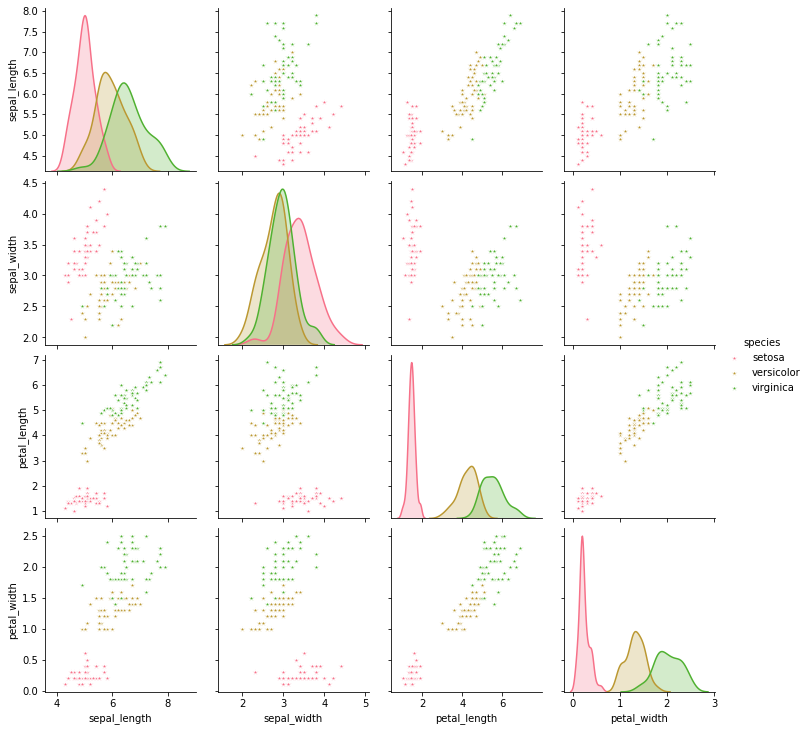

In [43]:
g = sns.pairplot(data, hue='species', markers='*')
plt.show()

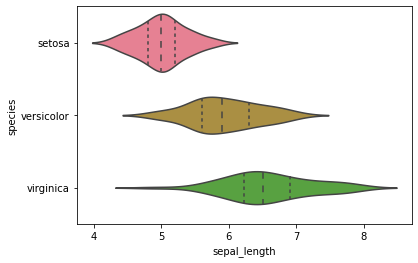

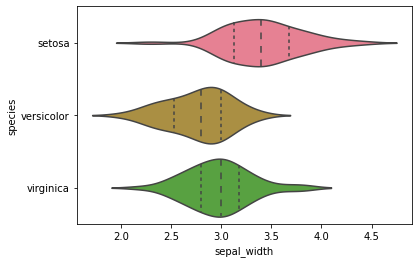

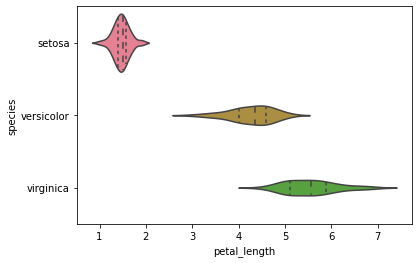

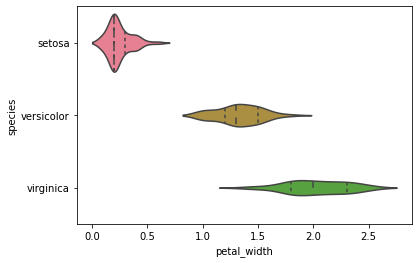

In [44]:
g = sns.violinplot(x='sepal_length', y='species', data=data, inner='quartile')
plt.show()

g = sns.violinplot(x='sepal_width', y='species', data=data, inner='quartile')
plt.show()

g = sns.violinplot(x='petal_length', y='species', data=data, inner='quartile')
plt.show()

g = sns.violinplot(x='petal_width', y='species', data=data, inner='quartile')
plt.show()


In [45]:
X = data.drop('species', axis=1)
y = data['species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


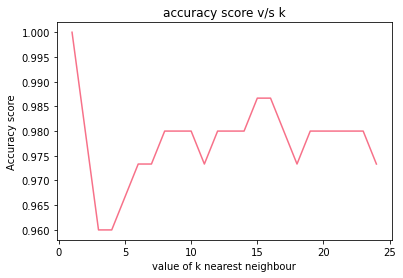

In [46]:
k_range = list(range(1,25))
scores=[]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    x_fit = knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range, scores)
plt.xlabel("value of k nearest neighbour")
plt.ylabel("Accuracy score")
plt.title("accuracy score v/s k")
plt.show()

In [47]:
logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)
score = metrics.accuracy_score(y, y_pred)

print(score)


0.9733333333333334


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=5)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


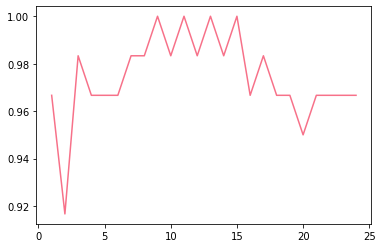

In [52]:
k_range = list(range(1,25))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
